# **REGRESSION TASK REPORT**

## Introduction:

So we had 2 datasets of PakWheels used cars as CSV files. \
Pakwheels is one of, if not the most biggest used car bussiness in Pakistan. 

Our objective was to predict the price of cars using all the data avaliable.

## Data Cleaning and Preparation:

So to prepare data I first converted both the csv files into dataframes to work with them.
But both the files had some column names and order different so i fixed that and combined both the datasets into a single dataset.
That single dataset had 155115 rows x 14 columns.

So now some columns had missing values that needed to be fixed. So, first i went to column=assembly that mentioned if a car was imported and rest on the values were null. So i turned the null values into "local"

then there was a need to remove the rest of the null values too.
I could have with made the value zero or took a mean, but i think that would have compromised the integrity of our data.
Innstead I removed all the rows that had missing data and in the end i was left with a total of 126177 rows with no missing values.

then i divided the data into both numeric and categorical features since we had to apply encoding to categorical features.
I checked the unique values in all categorical features and found out of 9, 3 had three or less unique values so instead of using label encoding i used one-hot encoding on these 3 features and on the rest 6 i used label encoding.
(since label encoding considers orginal relation between values)
And i standerdized the rest of numeric features and combined them all back together into a new dataframe.

now all the features (16) are in X
and the target "Price" is stored in Y
then i divinded the data 80-20% for training and testing respectively.

## Data Analysis and Visualization:

This was data description:

In [ ]:
data.describe()

,addref,city,body,make,model,year,engine,color,registered,mileage,price
count,1.261770e+05,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,1.261770e+05
mean,7.808269e+06,143.190328,11.808967,35.156201,123.281834,1959.415440,1395.545591,243.959557,59.661959,91261.693629,3.855047e+06
std,2.537195e+05,59.911454,4.618415,12.705168,79.543327,54.410502,635.880125,123.463174,22.328984,83838.874090,5.297704e+06
min,4.478110e+05,0.000000,0.000000,0.000000,0.000000,1905.000000,100.000000,0.000000,0.000000,1.000000,1.100000e+05
25%,7.801951e+06,98.000000,7.000000,19.000000,72.000000,1905.000000,1000.000000,157.000000,37.000000,38000.000000,1.550000e+06
50%,7.861680e+06,140.000000,15.000000,44.000000,81.000000,1991.000000,1300.000000,304.000000,55.000000,80000.000000,2.790000e+06
75%,7.904505e+06,182.000000,16.000000,45.000000,168.000000,2015.000000,1600.000000,359.000000,80.000000,122222.000000,4.515000e+06
max,7.943741e+06,289.000000,20.000000,49.000000,307.000000,2022.000000,15000.000000,383.000000,106.000000,1000000.000000,5.290000e+08


Histograms of numeric features: 

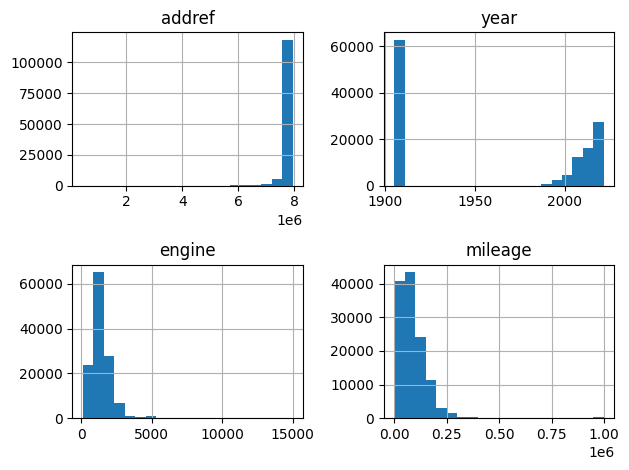

Correlation Matrix:

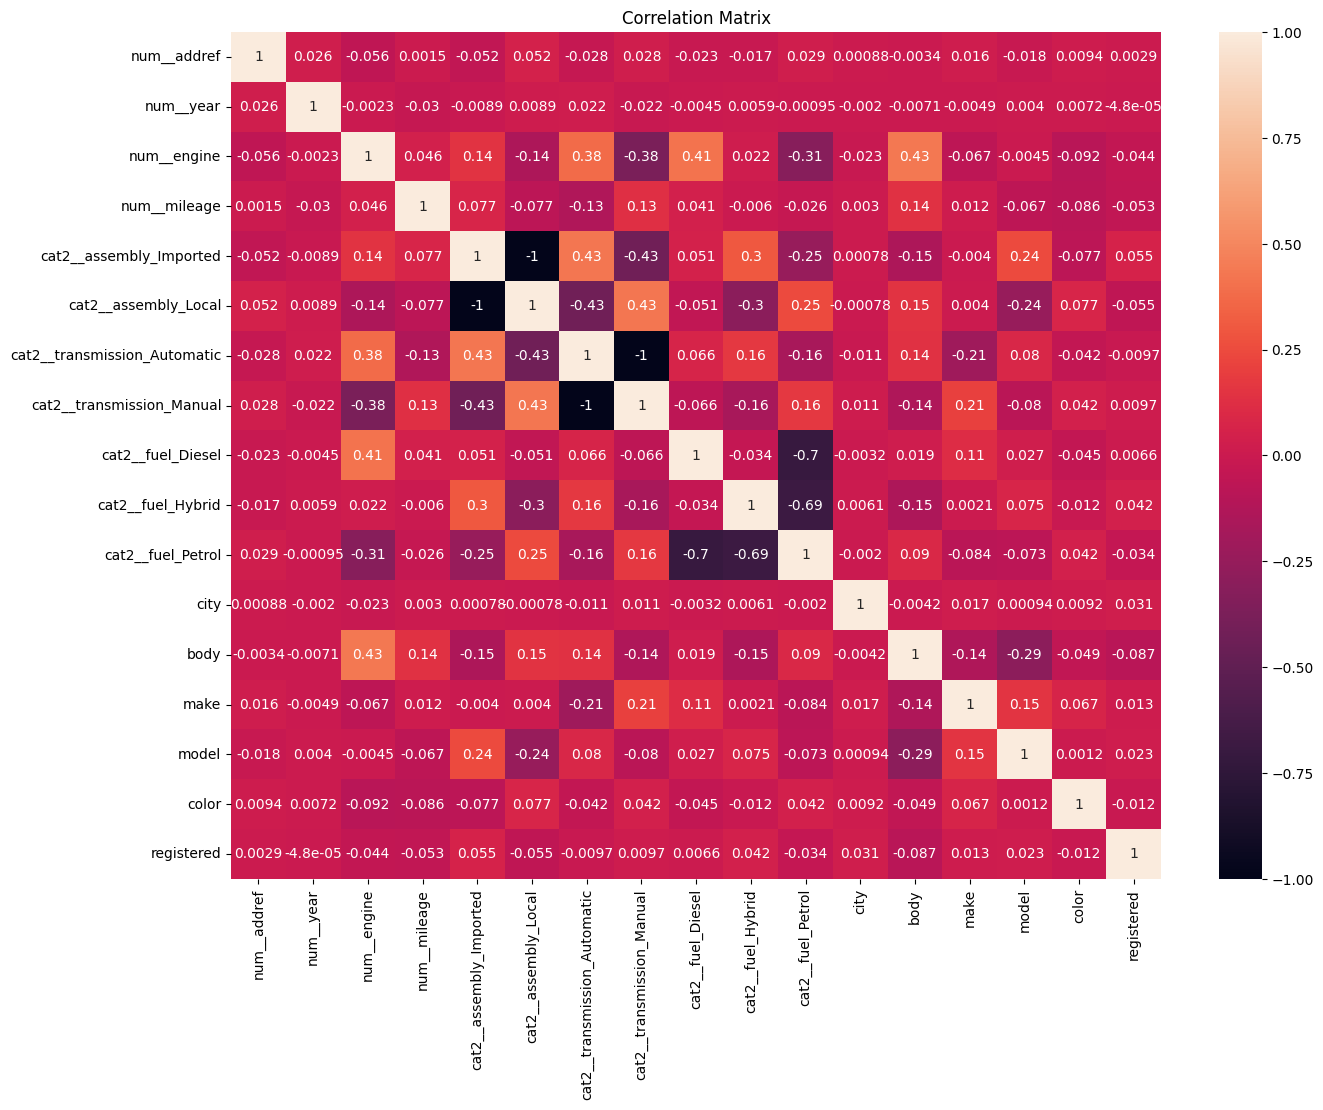

Here we can see which features have high coorelation with each other and which have low or negligiable.


## Model Training

SO i used 4 models:

1. **Linear Regression** is a simple and interpretable model that serves as a good baseline. \
It assumes a linear relationship between the features. \
It is simple and computationally efficient.

2. **Random Forest** is an ensemble method that combines multiple decision trees to improve predictive performance and control overfitting. \
It also captures non-linear relationships. 

3. **Support Vector Regressor** has ability to handle non-linear relationships effectively through the use of kernel functions. \
SVR's has a capacity to generalize well in high-dimensional spaces makes it particularly suitable for our dataset, which includes diverse features such as city, make, and model. \
By incorporating SVR, we can leverage these strengths to potentially achieve more accurate and reliable predictions compared to other regression models.

4. **XGBoost** is a more powerful gradient boosting model. \
It builds an ensemble of trees sequentially, with each tree correcting the errors of the previous ones. 
XGBoost includes regularization to prevent overfitting and can handle missing values internally.

## Model Evaluation:

Summary of Model Performance: \
Linear Regression----------- MSE: 14432526955143.059 , R^2 Score: 0.4474837975521877 \
Random Forest Regressor-- MSE: 2544110865175.614 ,  R^2 Score: 0.9026045488636945 \
XGBoost Regressor--------- MSE: 2004841494133.1482 , R^2 Score: 0.9232492402549429 \
Support Vector Regressor-- MSE: 27323232332568.68 ,  R^2 Score: -0.046007301002161105

**Best Model:** XGBoost Regressor, as it has the highest R² score and the lowest MSE, indicating it is the most accurate in predicting car prices. \
**Poor Performers:** Linear Regression and Support Vector Regressor. Particularly, the SVR is performing very poorly and is not suitable for this task without significant tuning or feature adjustments.

Next i tried doing some feature engineering as in removing outliers from price etc. \
But the response was not that satisfactory. \
I applied XGB again since it gave me best result: \
MSE: 295848027683.95123, R^2 Score: 0.9239309048034015 

MSE went from 10^12 to 10^11 and R^2 increased by 0.0007